In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
!pip install matplotlib -U # matplotlib update

!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv

!rm ~/.cache/matplotlib -rf 

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['NanumGothic', 'sans-serif']

plt.rcParams['axes.unicode_minus'] = False

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
log = pd.read_csv('/content/drive/MyDrive/data/a1_factory /data/log_csv.csv',index_col = 0)
log

#ab test , 퍼널분석(AARRR)
#1.  collect_time groupby uid의 수 - 하루동안 접속한 유저의 수 (daily active user)

uid action_type category1  category2  category3  \
0        avpKyWMn/xEADNlb        View      주방용품     그릇·홈세트    식판·나눔접시   
1        0+5vEmGkOuAAB5j2      Basket       패브릭         매트   주방·다용도매트   
2        r8DXy2OtSl8AAojG        View       패브릭     커튼·부자재       암막커튼   
3        dC9Fl2Ly9lcADrTn   Highlight     데코·식물     플라워·식물      화병·화분   
4        09gKcGLg0I8ACyQy        View        가구     진열장·책장         책장   
...                   ...         ...       ...        ...        ...   
5659536  PUpxWWMWdcIACR2B        View      주방용품     칼·커팅기구  채칼·다지기·강판   
5659537  PVMstmNg4I4ADq9R      Basket        가구     진열장·책장         책장   
5659538  diRXdmN49dUABrVo        View        가구  테이블·식탁·책상         식탁   
5659539  dusFzWJvp5cADhZW        View    가전·디지털       계절가전   전기히터·온풍기   
5659540  bgy5ZGOszc4ADrmd        View        가구     화장대·콘솔      일반화장대   

                collect_time geoip_city_name useragent_os  viewrate  viewtime  
0        2022-12-29 17:29:02     Seongnam-si      Windows     100.0     80033  
1        2022-12-29 12:56:38       Yongin-si      Windows       0.0         0  
2        2022-12-29 17:11:30           Seoul          iOS     100.0       947  
3        2022-12-29 17:54:30  Gwangmyeong-si      Windows       0.0         0  
4        2022-12-29 18:45:05       Jongno-gu     Mac OS X     100.0      1238  
...                      ...             ...          ...       ...       ...  
5659536  2022-12-28 20:01:30           Seoul      Android     100.0     13893  
5659537  2022-12-28 14:30:09           Jinju      Windows       0.0         0  
5659538  2022-12-29 12:45:13           Gunpo      Android     100.0     47217  
5659539  2022-12-28 11:07:30           Seoul      Android     100.0     54030  
5659540  2022-12-29 08:14:39           Iksan          iOS       0.0         0  

[5659541 rows x 10 columns]

In [5]:
log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659541 entries, 0 to 5659540
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   uid              object 
 1   action_type      object 
 2   category1        object 
 3   category2        object 
 4   category3        object 
 5   collect_time     object 
 6   geoip_city_name  object 
 7   useragent_os     object 
 8   viewrate         float64
 9   viewtime         int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 475.0+ MB


In [6]:
log.collect_time = pd.to_datetime(log.collect_time)


In [7]:
log 

uid action_type category1  category2  category3  \
0        avpKyWMn/xEADNlb        View      주방용품     그릇·홈세트    식판·나눔접시   
1        0+5vEmGkOuAAB5j2      Basket       패브릭         매트   주방·다용도매트   
2        r8DXy2OtSl8AAojG        View       패브릭     커튼·부자재       암막커튼   
3        dC9Fl2Ly9lcADrTn   Highlight     데코·식물     플라워·식물      화병·화분   
4        09gKcGLg0I8ACyQy        View        가구     진열장·책장         책장   
...                   ...         ...       ...        ...        ...   
5659536  PUpxWWMWdcIACR2B        View      주방용품     칼·커팅기구  채칼·다지기·강판   
5659537  PVMstmNg4I4ADq9R      Basket        가구     진열장·책장         책장   
5659538  diRXdmN49dUABrVo        View        가구  테이블·식탁·책상         식탁   
5659539  dusFzWJvp5cADhZW        View    가전·디지털       계절가전   전기히터·온풍기   
5659540  bgy5ZGOszc4ADrmd        View        가구     화장대·콘솔      일반화장대   

               collect_time geoip_city_name useragent_os  viewrate  viewtime  
0       2022-12-29 17:29:02     Seongnam-si      Windows     100.0     80033  
1       2022-12-29 12:56:38       Yongin-si      Windows       0.0         0  
2       2022-12-29 17:11:30           Seoul          iOS     100.0       947  
3       2022-12-29 17:54:30  Gwangmyeong-si      Windows       0.0         0  
4       2022-12-29 18:45:05       Jongno-gu     Mac OS X     100.0      1238  
...                     ...             ...          ...       ...       ...  
5659536 2022-12-28 20:01:30           Seoul      Android     100.0     13893  
5659537 2022-12-28 14:30:09           Jinju      Windows       0.0         0  
5659538 2022-12-29 12:45:13           Gunpo      Android     100.0     47217  
5659539 2022-12-28 11:07:30           Seoul      Android     100.0     54030  
5659540 2022-12-29 08:14:39           Iksan          iOS       0.0         0  

[5659541 rows x 10 columns]

In [8]:
uid_count = log['uid']
len(uid_count)
uid_count

0          avpKyWMn/xEADNlb
1          0+5vEmGkOuAAB5j2
2          r8DXy2OtSl8AAojG
3          dC9Fl2Ly9lcADrTn
4          09gKcGLg0I8ACyQy
                 ...       
5659536    PUpxWWMWdcIACR2B
5659537    PVMstmNg4I4ADq9R
5659538    diRXdmN49dUABrVo
5659539    dusFzWJvp5cADhZW
5659540    bgy5ZGOszc4ADrmd
Name: uid, Length: 5659541, dtype: object

In [9]:
log_df = log.duplicated(subset = ['uid'])
print(log_df)

0          False
1          False
2          False
3          False
4          False
           ...  
5659536    False
5659537     True
5659538     True
5659539     True
5659540     True
Length: 5659541, dtype: bool


In [10]:
len(log[log_df==False]) #uid중복된 값 없애고 uid의수 :하루동안의 접속자 수

828537

In [11]:
log.shape

(5659541, 10)

In [12]:
log.describe()



viewrate      viewtime
count  5.657112e+06  5.659541e+06
mean   7.677686e+01  5.126022e+04
std    4.221447e+01  5.810345e+05
min    0.000000e+00  0.000000e+00
25%    1.000000e+02  8.940000e+02
50%    1.000000e+02  1.010400e+04
75%    1.000000e+02  4.800500e+04
max    1.000000e+02  8.636989e+07

In [13]:
log.isnull().sum() #null값 확인


uid                186313
action_type             0
category1               0
category2               0
category3          780006
collect_time            0
geoip_city_name    417032
useragent_os            0
viewrate             2429
viewtime                0
dtype: int64

In [14]:
log.dropna(inplace = True)
log.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4364999 entries, 0 to 5659540
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   uid              object        
 1   action_type      object        
 2   category1        object        
 3   category2        object        
 4   category3        object        
 5   collect_time     datetime64[ns]
 6   geoip_city_name  object        
 7   useragent_os     object        
 8   viewrate         float64       
 9   viewtime         int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 366.3+ MB


In [15]:
# category 1
len(log['category1'].unique()) 

2655

In [16]:
# category2 
len(log['category2'].unique())

548

In [17]:
# category3 
len(log['category3'].unique())


1683

In [18]:
Index = np.arange(1,4365000)

log.set_index(Index, inplace =True)

In [19]:
# pip install matplotlib==3.1.1


Text(0.5, 1.0, 'Num of UserAgent')

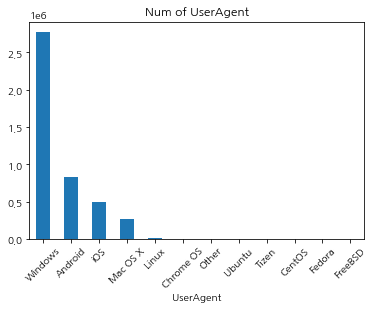

In [20]:
log.useragent_os.value_counts().plot(kind ='bar')
plt.xticks(rotation = 45)
plt.xlabel('UserAgent')
plt.title('Num of UserAgent')


(array([0.5, 1.5]), [Text(0.5, 0, 'viewrate'), Text(1.5, 0, 'viewtime')])

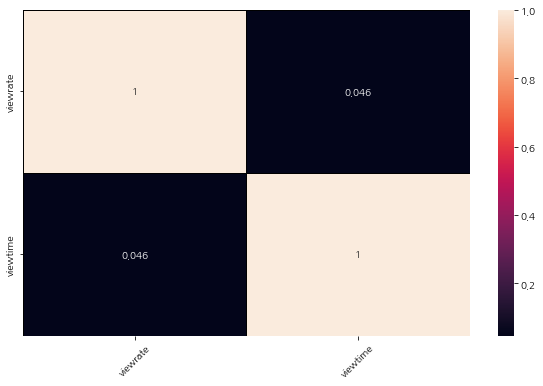

In [21]:
ax = plt.figure(figsize = (10,6))
corr = log.corr()
sns.heatmap(corr, linewidths = 1, linecolor = 'black', annot = True)
plt.xticks(rotation=45)

In [22]:
log.viewrate.value_counts()

100.00    3393077
0.00       952613
99.91        5744
99.90        2670
99.93        1729
           ...   
63.80           1
94.51           1
92.81           1
82.25           1
2.25            1
Name: viewrate, Length: 1646, dtype: int64

In [23]:
log[log['viewtime'] >= log['viewtime'].mean()] # 제일 많은 시간 머문 uid 

uid action_type category1 category2 category3  \
1        avpKyWMn/xEADNlb        View      주방용품    그릇·홈세트   식판·나눔접시   
9        fG9bBGOixrkAB+UC        View     유아·아동    유아동패브릭   턱받이·손수건   
11       eaoY0WN8dj4AB9W6        View     데코·식물      홈갤러리     그림·사진   
13       PSC7BWJrY14ABLnw        View       패브릭    이불·이불솜        이불   
14       Ow81a2KCTO0ADJ9z        View       패브릭    러그·카페트      기타러그   
...                   ...         ...       ...       ...       ...   
4364953  d8l1m2OO/xcABvnh        View       패브릭    러그·카페트    사이잘룩러그   
4364977  amVCm2AA07gADLtz        View        가구        선반  앵글·조립식선반   
4364984  DgWzQWOr7+0AAaTp        View        가구    서랍·수납장       수납장   
4364988  tEL3RGN12uoABnpL        View    가전·디지털   세탁기·건조기     드럼세탁기   
4364998  dusFzWJvp5cADhZW        View    가전·디지털      계절가전  전기히터·온풍기   

               collect_time    geoip_city_name useragent_os  viewrate  \
1       2022-12-29 17:29:02        Seongnam-si      Windows     100.0   
9       2022-12-29 16:20:47            Cheonan      Windows     100.0   
11      2022-12-29 15:44:56           Ansan-si      Windows     100.0   
13      2022-12-29 13:03:15              Seoul      Windows     100.0   
14      2022-12-29 16:20:31  Yeongdeungpo-dong      Android     100.0   
...                     ...                ...          ...       ...   
4364953 2022-12-29 15:25:03              Daegu      Windows     100.0   
4364977 2022-12-28 18:59:09              Seoul      Android     100.0   
4364984 2022-12-28 16:30:55            Incheon     Mac OS X     100.0   
4364988 2022-12-28 17:07:42             Nam-gu      Windows     100.0   
4364998 2022-12-28 11:07:30              Seoul      Android     100.0   

         viewtime  
1           80033  
9           89718  
11         160273  
13         229178  
14          86006  
...           ...  
4364953     92342  
4364977    166167  
4364984     99653  
4364988    228012  
4364998     54030  

[1021944 rows x 10 columns]

In [24]:
# uid : 고유의 값 -> 유저 식별을 위한 인덱스(동일한 아이디일때 같은 유저라고 파악됨.)
# action_type : 유저가 한 행동
#   - view : 페이지 방문
#   - basket : 장바구니 버튼
#   - Highlight : 드래그 이벤트 발생
#   - Copy : 복사 이벤트 발생
#   - SINF : 광고 유입을 통한 입장 
# Viewrate : 유저가 페이지에서 확인한 내용들을 의미  
# viewtime 유저가 페이지에 머문 시간을 의미(단위 : ms)   

# --> 목표: 로그데이터 정리 및 uid에 따른 각종 지표 정리 및 대시보드 구축 -- DAU(Daily Active User), Active User, 퍼널 분석
#          데이터를 통한 유저 인사이트 제공 및 새로운 기획전 구축 전략 수립 

In [25]:
# bidding_result 
# 1. 목표된 예산 카테고리별, 고유 index 별 클릭 최적화 로직 구성 --> log.csv파일 같이 사용하여 
# 2. 일 예산 (100만원)
# 3. 입찰 결과를 종합할 수 있는 대시보드 

In [26]:
# 가설
# click이 높을 수록 cost가 많이 발생한다. 
# 

In [60]:
data = pd.read_csv('/content/drive/MyDrive/data/a1_factory /data/bidding_results_추가 데이터.csv', index_col = 0)
data.head()
#온라인광고 집행내역

Impression  Click   Cost  Sum of AD rank  Bid  Price(PC)  \
index                                                               
3575092           3      0    0.0        3.000000   50     165900   
3575637           6      0    0.0        3.333333   50      10900   
4129259           7      0    0.0        8.000000   50     255000   
4131479          36      3  150.0        4.416667  140     190000   
4131482         224      0    0.0        5.696429   50     129000   

         Price(Mobile)  Delivery Fee Category Name 1 Category Name 2  \
index                                                                  
3575092         165900             0         가구/인테리어            침실가구   
3575637          10900             0         가구/인테리어          인테리어소품   
4129259         255000            -1         가구/인테리어            거실가구   
4131479         190000         20000         가구/인테리어        아동/주니어가구   
4131482         129000             0         가구/인테리어        아동/주니어가구   

        Category Name 3 Category Name 4      date  
index                                              
3575092         장롱/붙박이장            드레스룸  20221031  
3575637        아로마/캔들용품      아로마방향제/디퓨저  20221031  
4129259              소파           패브릭소파  20221031  
4131479          책상의자세트             NaN  20221031  
4131482              책상             NaN  20221031

In [61]:
data.shape

(1337088, 13)

In [62]:
len(data[data.duplicated()])
# 중복된항목 없음.


151953

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337088 entries, 3575092 to 2566923
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Impression       1337088 non-null  int64  
 1   Click            1337088 non-null  int64  
 2   Cost             1337088 non-null  float64
 3   Sum of AD rank   1337078 non-null  float64
 4   Bid              1337088 non-null  int64  
 5   Price(PC)        1337088 non-null  int64  
 6   Price(Mobile)    1337088 non-null  int64  
 7   Delivery Fee     1337088 non-null  int64  
 8   Category Name 1  1337088 non-null  object 
 9   Category Name 2  1337088 non-null  object 
 10  Category Name 3  1331221 non-null  object 
 11  Category Name 4  930132 non-null   object 
 12  date             1337088 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 142.8+ MB


In [64]:
dtype_data = data.dtypes.reset_index()
dtype_data.columns = ['Count','Column Type']
dtype_data = dtype_data.groupby('Column Type').aggregate('count').reset_index()
dtype_data

Column Type  Count
0       int64      7
1     float64      2
2      object      4

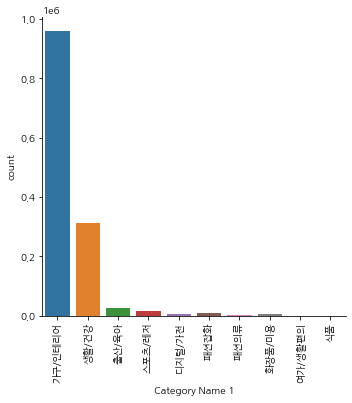

<Figure size 2160x4320 with 0 Axes>

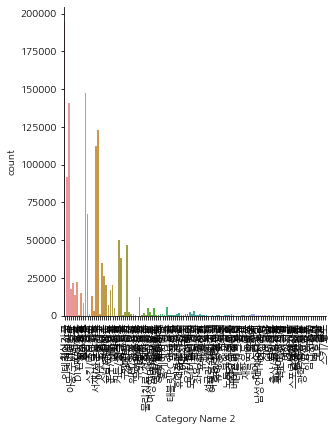

<Figure size 2160x4320 with 0 Axes>

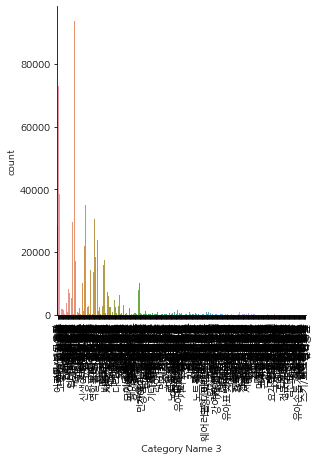

<Figure size 2160x4320 with 0 Axes>

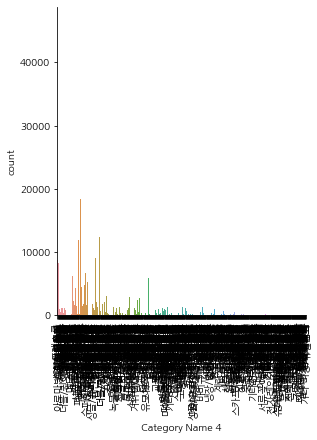

<Figure size 2160x4320 with 0 Axes>

In [65]:
# 범주형 변수 시각화
for col in data.select_dtypes(include = ['object']).columns:
  fig = sns.catplot(x = col, kind = 'count', data = data ,hue = None)
  fig.set_xticklabels(rotation = 90)
  plt.figure(figsize=(30, 60))
  plt.show()


In [66]:
# data['Category Name 1'].value_counts()
data['Category Name 2'].value_counts()
data['Category Name 3'].value_counts()
data['Category Name 4'].value_counts()

침대프레임    46472
패브릭소파    44015
식탁테이블    37744
거실용커튼    28163
식탁세트     25967
         ...  
낚시텐트         2
실내화          2
물총           1
파일           1
전동드릴         1
Name: Category Name 4, Length: 734, dtype: int64

In [67]:
data.isnull().sum()
# null값 처리를 어떻게 해줄 것인가? 

Impression              0
Click                   0
Cost                    0
Sum of AD rank         10
Bid                     0
Price(PC)               0
Price(Mobile)           0
Delivery Fee            0
Category Name 1         0
Category Name 2         0
Category Name 3      5867
Category Name 4    406956
date                    0
dtype: int64

In [68]:
count_nan = data.isnull().sum()
print(count_nan[count_nan > 0])

Sum of AD rank         10
Category Name 3      5867
Category Name 4    406956
dtype: int64


<AxesSubplot: >

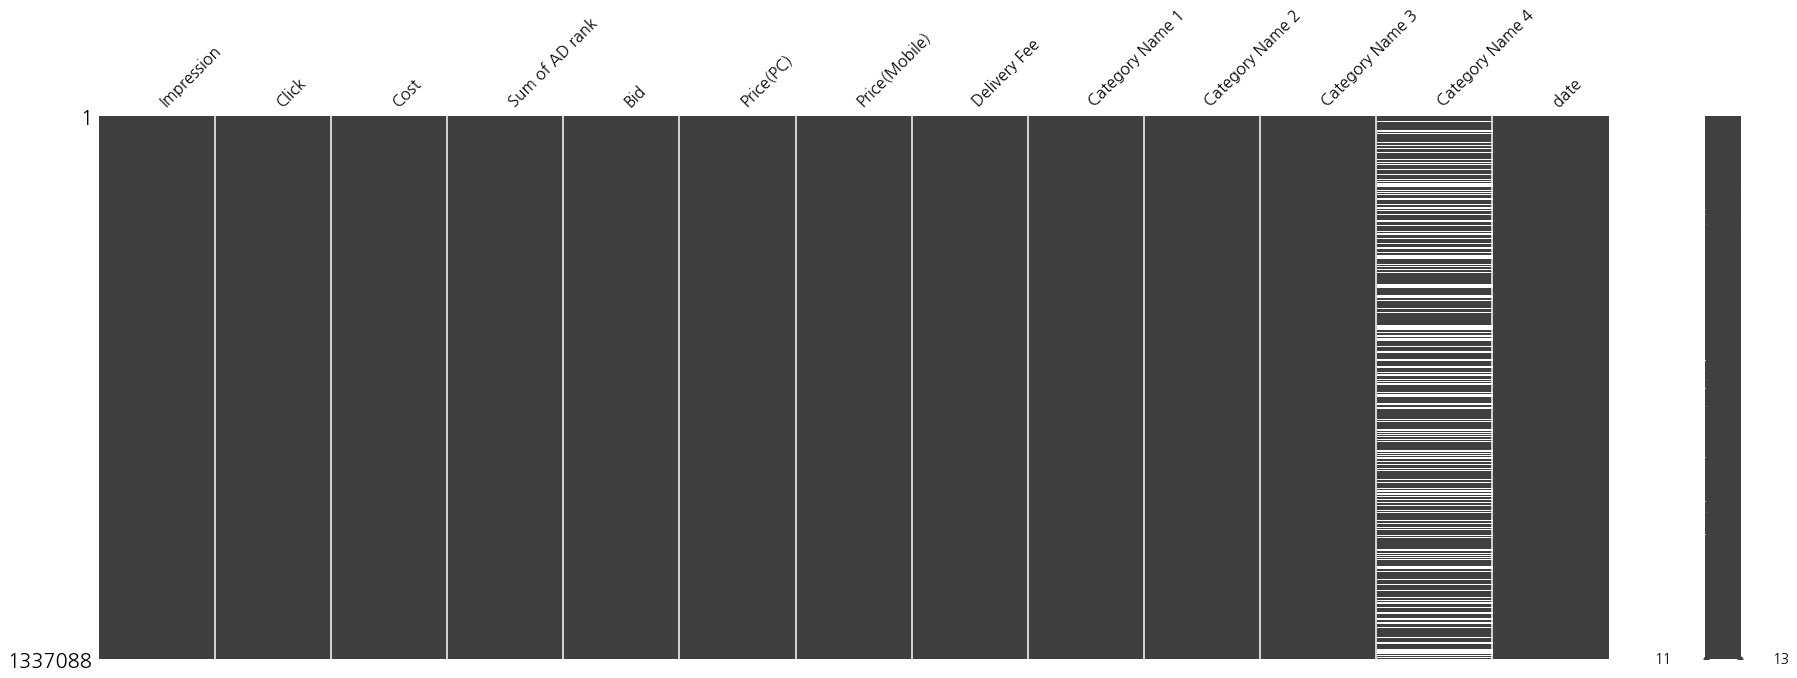

In [69]:
import missingno as msno
msno.matrix(data, figsize = (30,10))

# Category Name 4 에 상당히 많은 Null 값이 존재함. 


<AxesSubplot: ylabel='index'>

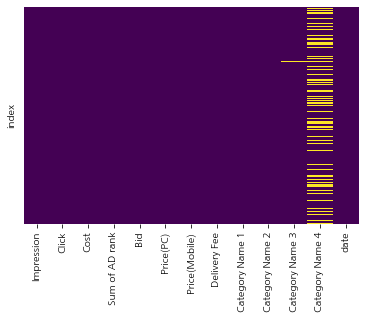

In [70]:
# seaborn - heatmap 확인
sns.heatmap(data.isnull(), cbar = False , yticklabels = False, cmap = 'viridis')

In [71]:
#결측값을 어떻게 처리할 것인가? 
#categorical 변수를 numerical 하게 변화시켜야 하는데, 너무 많은 분류를 이루고 있는 경우에는  
data

Impression  Click   Cost  Sum of AD rank  Bid  Price(PC)  \
index                                                               
3575092           3      0    0.0        3.000000   50     165900   
3575637           6      0    0.0        3.333333   50      10900   
4129259           7      0    0.0        8.000000   50     255000   
4131479          36      3  150.0        4.416667  140     190000   
4131482         224      0    0.0        5.696429   50     129000   
...             ...    ...    ...             ...  ...        ...   
2566795           5      0    0.0       13.200000  500      19900   
2566880           3      0    0.0       17.000000  500      23900   
2566881           1      0    0.0        8.000000  500       2500   
2566891           2      0    0.0        4.000000  500      21000   
2566923          14      0    0.0       12.428571  500     128800   

         Price(Mobile)  Delivery Fee Category Name 1 Category Name 2  \
index                                                                  
3575092         165900             0         가구/인테리어            침실가구   
3575637          10900             0         가구/인테리어          인테리어소품   
4129259         255000            -1         가구/인테리어            거실가구   
4131479         190000         20000         가구/인테리어        아동/주니어가구   
4131482         129000             0         가구/인테리어        아동/주니어가구   
...                ...           ...             ...             ...   
2566795          19900             0         가구/인테리어          인테리어소품   
2566880          23900          3000           생활/건강         문구/사무용품   
2566881           2500          3000         가구/인테리어          인테리어소품   
2566891          21000          3000           생활/건강         정원/원예용품   
2566923         128800             0         가구/인테리어          인테리어소품   

        Category Name 3 Category Name 4      date  
index                                              
3575092         장롱/붙박이장            드레스룸  20221031  
3575637        아로마/캔들용품      아로마방향제/디퓨저  20221031  
4129259              소파           패브릭소파  20221031  
4131479          책상의자세트             NaN  20221031  
4131482              책상             NaN  20221031  
...                 ...             ...       ...  
2566795        아로마/캔들용품      아로마방향제/디퓨저  20230103  
2566880        이벤트/파티용품            데코용품  20230103  
2566881          기타장식용품             NaN  20230103  
2566891            화분받침             NaN  20230103  
2566923              액자      퍼즐/그림/사진액자  20230103  

[1337088 rows x 13 columns]

In [72]:
data['date']= data['date'].astype('str')


In [77]:
data['date'] = pd.to_datetime(data['date'])

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337088 entries, 3575092 to 2566923
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Impression       1337088 non-null  int64         
 1   Click            1337088 non-null  int64         
 2   Cost             1337088 non-null  float64       
 3   Sum of AD rank   1337078 non-null  float64       
 4   Bid              1337088 non-null  int64         
 5   Price(PC)        1337088 non-null  int64         
 6   Price(Mobile)    1337088 non-null  int64         
 7   Delivery Fee     1337088 non-null  int64         
 8   Category Name 1  1337088 non-null  object        
 9   Category Name 2  1337088 non-null  object        
 10  Category Name 3  1331221 non-null  object        
 11  Category Name 4  930132 non-null   object        
 12  date             1337088 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(6), object(

In [80]:
data[data['Cost'] == data['Cost'].max()]

Impression  Click      Cost  Sum of AD rank  Bid  Price(PC)  \
index                                                                  
9734141        7967    196  325300.0        1.832434   50      89000   

         Price(Mobile)  Delivery Fee Category Name 1 Category Name 2  \
index                                                                  
9734141          89000             0         가구/인테리어            수납가구   

        Category Name 3 Category Name 4       date  
index                                               
9734141              행거             NaN 2022-11-27

In [81]:
data[data['Click'] == data['Click'].max()] # Click 수- max

Impression  Click      Cost  Sum of AD rank   Bid  Price(PC)  \
index                                                                   
3510537       23904    474  142460.0        1.216073  1000     117900   
3510537       23904    474  142460.0        1.216073  1000     117900   

         Price(Mobile)  Delivery Fee Category Name 1 Category Name 2  \
index                                                                  
3510537         117900             0           생활/건강         문구/사무용품   
3510537         117900             0           생활/건강         문구/사무용품   

        Category Name 3 Category Name 4       date  
index                                               
3510537        다이어리/플래너          캘린더/달력 2022-11-17  
3510537        다이어리/플래너          캘린더/달력 2022-11-17

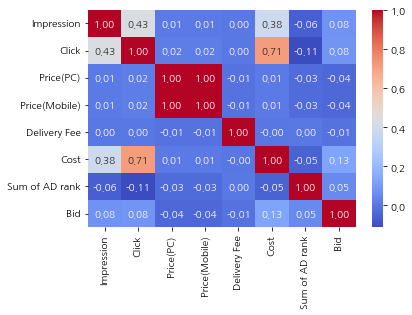

In [83]:
#### Correlation Matrix 
g = sns.heatmap(data[['Impression','Click','Price(PC)','Price(Mobile)','Delivery Fee','Cost','Sum of AD rank','Bid']].corr() , annot = True, fmt = '.2f', cmap = 'coolwarm')


# Impression 이 click ,cost 와 상관관계가 있으며 cost와 click의 경우 서로 매우 높은 정의 관계를 이룬다고 볼 수 있다. 
# Bid - Cost

In [84]:
# cpc 광고
# Cost per click 시각화 
import plotly.express as px

fig = px.line(x = data['Cost'], y =data['Click'] , title = 'CPC')
# print(fig)

fig.show() # x: Cost , y : Click 

Output hidden; open in https://colab.research.google.com to view.

In [85]:
# cpc 광고
# Cost - Impression 시각화 
import plotly.express as px

fig = px.line(x = data['Cost'], y =data['Impression'] , title = 'Cost & Impression')
# print(fig)

fig.show() 

Output hidden; open in https://colab.research.google.com to view.

In [93]:
 
import plotly.express as px

fig = px.line(x = data['Bid'], y =data['Click'] , title = 'Bid & Click')
# print(fig)

fig.show() 

In [87]:
#
data.groupby(['Category Name 1'])['Click'].mean().sort_values(ascending=False)


Category Name 1
출산/육아      2.103381
여가/생활편의    1.871122
디지털/가전     1.801290
스포츠/레저     1.228197
패션의류       1.054771
패션잡화       0.910224
생활/건강      0.865807
화장품/미용     0.838408
가구/인테리어    0.615040
식품         0.114286
Name: Click, dtype: float64

In [88]:
#
data.groupby(['Category Name 1'])['Cost'].mean().sort_values(ascending=False)

Category Name 1
패션의류       346.559692
출산/육아      290.765227
패션잡화       252.222787
디지털/가전     224.547673
생활/건강      200.617066
스포츠/레저     191.827177
화장품/미용     182.791132
가구/인테리어    168.901952
여가/생활편의    156.634845
식품           9.428571
Name: Cost, dtype: float64

In [89]:
data.groupby(['Category Name 1']).Cost.sum()

Category Name 1
가구/인테리어    161681900.0
디지털/가전       1288230.0
생활/건강       62977910.0
스포츠/레저       3121220.0
식품              1980.0
여가/생활편의       131260.0
출산/육아        7318270.0
패션의류          809910.0
패션잡화         1983480.0
화장품/미용       1368740.0
Name: Cost, dtype: float64

In [90]:
data.groupby(['Category Name 1']).Impression.sum()

Category Name 1
가구/인테리어    40522263
디지털/가전       594331
생활/건강      14101373
스포츠/레저       973108
식품             6030
여가/생활편의      102824
출산/육아       1902196
패션의류         120425
패션잡화         354229
화장품/미용       325612
Name: Impression, dtype: int64

In [91]:
data.groupby(['Category Name 1']).Click.sum()

Category Name 1
가구/인테리어    588749
디지털/가전      10334
생활/건강      271795
스포츠/레저      19984
식품             24
여가/생활편의      1568
출산/육아       52940
패션의류         2465
패션잡화         7158
화장품/미용       6278
Name: Click, dtype: int64